# Орбиты в геометрии Шварцшильда (Общая теория относительности)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import time
%matplotlib inline

In [2]:
fig_size = 10
newparams = {'axes.grid': True,
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

### Единицы

Мы будем использовать натуральные единицы, т.е. Пусть $G=c=1(=\hbar=k_B)$. В этих единицах любая скорость задается в терминах скорости света. То есть, если космический корабль имеет скорость $v=0.1$ в натуральных единицах, он имеет скорость $v=0.1 c\approx 3\cdot 10^7\,\mathrm{m/s}$ в единицах СИ.

Мы будем измерять расстояния в терминах радиуса Шварцшильда, часто называемого "горизонтом событий" или "точкой невозврата" в случае Черных дыр. Он задается

\begin{equation}
R_\mathrm{S} = \frac{2MG}{c^2} = 2M.
\end{equation}

Ничто не может убежать, оказавшись в радиусе Шварцшильда, даже свет. Мы не будем обсуждать это дальше, но оставим пару упражнений на эту тему позже. Введем безразмерные переменные

\begin{equation}
\rho\equiv \frac{r}{R_S} = \frac{r}{2M_\odot\mu} \quad \mathrm{and}\quad T\equiv \frac{\tau}{t_0},
\end{equation}

где $t_0$ - некоторое характерное время системы, а $\tau$ - собственное время. Обратите внимание, что $t_0$ имеют  размерность массы. Таким образом, мы можем выбрать $t_0=R_\mathrm{S}$.

**Упражнение:** Чему равен $R_\mathrm{S}$ для Солнца в единицах СИ? Чему равен $t_0$ в единицах СИ?  

### Эффективный Потенциал. Различия между классическими и орбитами в ОТО

В приложении мы покажем, что система может быть описана уравнением

\begin{equation}
\mathcal E = \frac{1}{2}\left(\frac{\mathrm d r}{\mathrm d\tau}\right)^2 + V_\mathrm{eff}(r),
\label{eq:energy_ein} \quad(2)
\end{equation}

где $\mathcal E$ - константа и

\begin{equation}
V_\mathrm{eff}(r)\equiv -\frac{M}{r}+\frac{l^2}{2r^2}- \frac{Ml^2}{r^3}
\label{eq:effpot} \quad(3)
\end{equation}

это эффективный потенциал. Константа $\mathcal E$ сводится в классическом пределе к плотности энергии частицы. Обратите внимание, что эффективный потенциал имеет точки экстремума в

\begin{equation}
r_\mathrm{min/max} = \frac{l^2}{2m}\mp \frac{l}{2}\sqrt{\frac{l^2}{m^2}-12}.
\end{equation}

В классической механике эффективный потенциал задается

\begin{equation}
V_\mathrm{classical}(r)= -\frac{M}{r}+\frac{l^2}{2r^2}.
\end{equation}

Этот потенциал имеет минимум при $r = l^2/M$

Последний член в уравнении (3) является общей релятивистской поправкой. Это слагаемое дает несколько различных типов орбит, с которыми мы не сталкиваемся в классической механике. Чтобы увидеть это, мы сначала визуализируем потенциалы. В приведенном ниже коде мы использовали вновь определенные единицы измерения.

In [8]:
def Veff(rho, l):
    """ Оценивает эффективный потенциал в геометрии Шварцшильда. """
    return -1/(2*rho) + l**2/(2*rho**2) - l**2/(2*rho**3)

def Vclassical(rho, l):
    """ Оценивает классический эффективный потенциал. """
    return -1/(2*rho) + l**2/(2*rho**2)

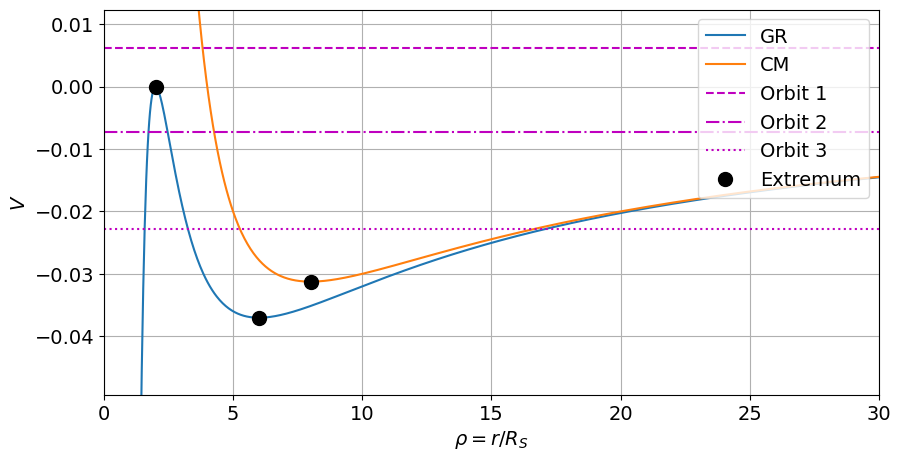

In [9]:
N = 1000
rho = np.linspace(1, 30, N)
l = 2


VGR = Veff(rho, l)
VCM = Vclassical(rho, l)


rhoCM_min = 2*l**2
VCM_min = -0.125/l**2

rho_min = l**2 + l*(l**2 - 3)**.5
VGR_min = Veff(rho_min, l)
rho_max = l**2 - l*(l**2 - 3)**.5
VGR_max = Veff(rho_max, l)

plt.figure(figsize=(fig_size, fig_size/2))

plt.plot(rho, VGR, label="GR")
plt.plot(rho, VCM, label="CM")

edge = VGR_max - VGR_min
plt.plot([0, rho[-1]], 2*[VGR_max + edge/6], "--m", label="Orbit 1")
plt.plot([0, rho[-1]], 2*[(VGR_max + VGR[-1])/2], "-.m", label="Orbit 2")
plt.plot([0, rho[-1]], 2*[(VCM_min + VGR[-1])/2], ":m", label="Orbit 3")

plt.plot(rhoCM_min, VCM_min, 'ko', label="Extremum")
plt.plot(rho_min, VGR_min, 'ko')
plt.plot(rho_max, VGR_max, 'ko')

plt.ylabel(r"$V$")
plt.xlabel(r"$\rho=r/R_S$")
plt.ylim([VGR_min - edge/3, VGR_max + edge/3])
plt.xlim([0, rho[-1]])
plt.legend(loc=1)
plt.show()